In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

In [2]:
"""Experiment 3

Load the titanic dataset and describe the dataset using pandas.
Identify missing values and fill missing with and mode.
Remove Outliers and display the dataset information after removing. 
Convert categorical variables into numerical ones for analysis purpose, and display the updated the dataset."""

'Experiment 3\n\nLoad the titanic dataset and describe the dataset using pandas.\nIdentify missing values and fill missing with and mode.\nRemove Outliers and display the dataset information after removing. \nConvert categorical variables into numerical ones for analysis purpose, and display the updated the dataset.'

In [3]:
titan = pd.read_csv(r"C:\Users\Lokesh Patra\Documents\Data Science\Jupyter Notebooks\Titanic.csv")

In [4]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
titan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
for column in titan.select_dtypes(include=[np.number]).columns:
    titan[column].fillna(titan[column].median(), inplace=True)

for column in titan.select_dtypes(include=['object']).columns:
    titan[column].fillna(titan[column].mode()[0], inplace=True)

print("\nMissing values after handling:")
titan.isnull().sum()


Missing values after handling:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

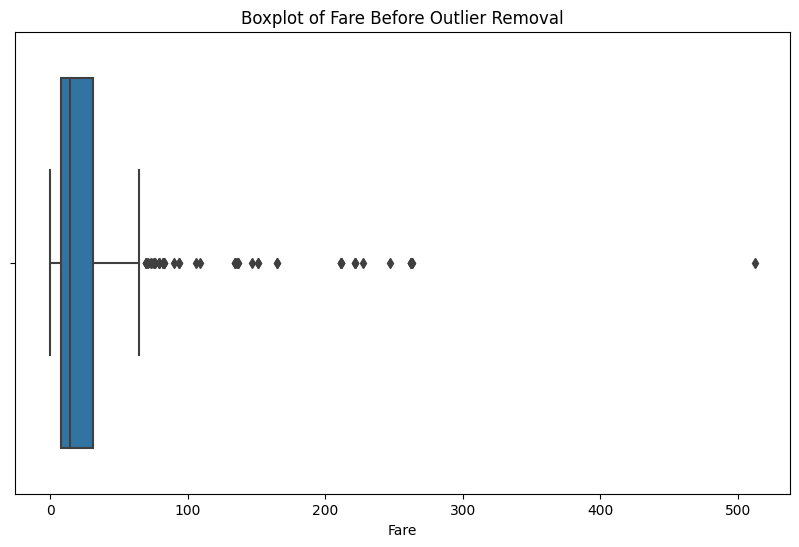

In [9]:
# Create a boxplot to visualize outliers in the 'Fare' column
plt.figure(figsize=(10, 6))
sns.boxplot(x = titan['Fare'])
plt.title('Boxplot of Fare Before Outlier Removal')
plt.xlabel('Fare')
plt.show()

In [10]:
def remove_outliers(titan, column):
    # Ensure the column is numeric
    titan[column] = pd.to_numeric(titan[column], errors='coerce')
    
    Q1 = titan[column].quantile(0.25)
    Q3 = titan[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    # Filter the dataframe
    filtered_titan = titan[(titan[column] >= lower_bound) & (titan[column] <= upper_bound)]
    
    filtered_titan.describe()
    
    # Print the number of rows before and after filtering
    print(f"Original number of rows: {len(titan)}")
    print(f"Number of rows after removing outliers: {len(filtered_titan)}")
    
    return filtered_titan

# Example usage
titan_cleaned = remove_outliers(titan, 'Fare')

titan_cleaned.describe()

Lower Bound: -27.468312499999996, Upper Bound: 66.8359875
Original number of rows: 418
Number of rows after removing outliers: 363


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,363.000000,363.000000,363.000000,363.000000,363.00000,363.000000,363.000000
mean,1096.900826,0.338843,2.429752,27.993113,0.37741,0.303030,18.251274
std,120.849644,0.473970,0.752452,11.335476,0.73825,0.737074,14.350374
min,892.000000,0.000000,1.000000,0.170000,0.00000,0.000000,0.000000
25%,993.500000,0.000000,2.000000,22.000000,0.00000,0.000000,7.854200
50%,1096.000000,0.000000,3.000000,27.000000,0.00000,0.000000,13.000000
75%,1200.000000,1.000000,3.000000,31.500000,1.00000,0.000000,26.000000
max,1309.000000,1.000000,3.000000,64.000000,5.00000,6.000000,65.000000


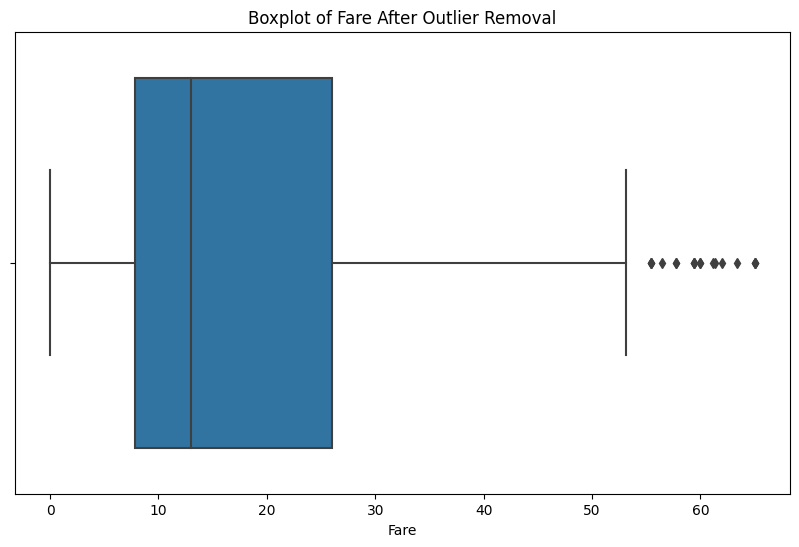

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = titan_cleaned['Fare'])
plt.title('Boxplot of Fare After Outlier Removal')
plt.xlabel('Fare')
plt.show()

In [12]:
titan_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  363 non-null    int64  
 1   Survived     363 non-null    int64  
 2   Pclass       363 non-null    int64  
 3   Name         363 non-null    object 
 4   Sex          363 non-null    object 
 5   Age          363 non-null    float64
 6   SibSp        363 non-null    int64  
 7   Parch        363 non-null    int64  
 8   Ticket       363 non-null    object 
 9   Fare         363 non-null    float64
 10  Cabin        363 non-null    object 
 11  Embarked     363 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 36.9+ KB


In [14]:
# Identify categorical columns
cat_columns = titan_cleaned.select_dtypes(['object']).columns

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
titan_cleaned_ = titan_cleaned.copy()

for col in cat_columns:
    titan_cleaned_[col] = pd.factorize(titan_cleaned_[col])[0]
    
print(" \nUpdated Dataset: ")
titan_cleaned_.head()

 
Updated Dataset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,0,0,34.5,0,0,0,7.8292,0,0
1,893,1,3,1,1,47.0,1,0,1,7.0000,0,1
2,894,0,2,2,0,62.0,0,0,2,9.6875,0,0
3,895,0,3,3,0,27.0,0,0,3,8.6625,0,1
4,896,1,3,4,1,22.0,1,1,4,12.2875,0,1


In [15]:
titan_cleaned_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  363 non-null    int64  
 1   Survived     363 non-null    int64  
 2   Pclass       363 non-null    int64  
 3   Name         363 non-null    int64  
 4   Sex          363 non-null    int64  
 5   Age          363 non-null    float64
 6   SibSp        363 non-null    int64  
 7   Parch        363 non-null    int64  
 8   Ticket       363 non-null    int64  
 9   Fare         363 non-null    float64
 10  Cabin        363 non-null    int64  
 11  Embarked     363 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 36.9 KB


In [ ]:
Light || BTCS-AMDS-SP7P